# Librerias

In [ ]:
import tensorflow as tf
from tensorflow import keras

from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import requests
from io import BytesIO

import cv2 #Rescalar imagenes
print(tf.__version__)

2.12.0


# Data

In [ ]:
data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
classNames = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botines']

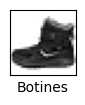

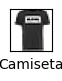

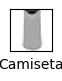

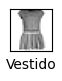

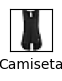

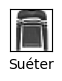

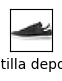

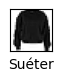

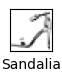

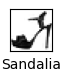

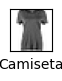

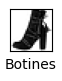

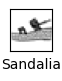

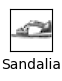

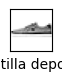

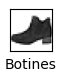

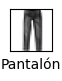

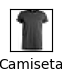

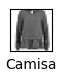

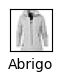

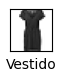

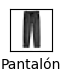

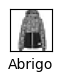

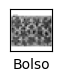

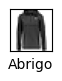

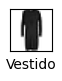

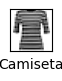

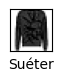

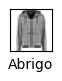

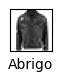

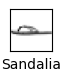

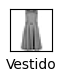

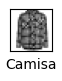

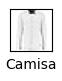

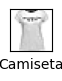

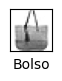

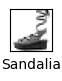

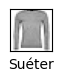

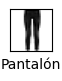

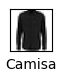

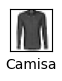

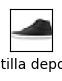

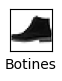

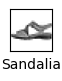

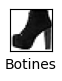

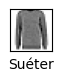

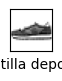

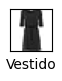

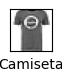

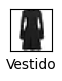

In [ ]:
plt.figure(figsize=(10,10))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(classNames[train_labels[i]])
  plt.show()

In [ ]:
train_images = train_images / 255
test_images = test_images / 255

# Red Neuronal

### Configuracion

In [ ]:
model = keras.Sequential([
 keras.layers.Flatten(input_shape=(28,28)),
 keras.layers.Dense(200, activation=tf.nn.relu), 
 keras.layers.Dense(10, activation=tf.nn.softmax)
])

### Compilacion

In [ ]:
model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                                 
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


# Ajustando la red

In [ ]:
model.fit(train_images,
train_labels,
epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4899 - accuracy: 0.8268
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3711 - accuracy: 0.8646
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3325 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3071 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2891 - accuracy: 0.8934
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2727 - accuracy: 0.8988
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2609 - accuracy: 0.9024
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2480 - accuracy: 0.9080
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2396 - accuracy: 0.9097
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3340 - accuracy: 0.8817
Test accuracy: 0.8816999793052673


# Predicciones

In [ ]:
predictions = model.predict(test_images)
img_predict = predictions[9]

313/313 [==============================] - 1s 2ms/step


In [ ]:
img_predict = predictions[1996]
classNum = np.argmax(img_predict) 
classNames[classNum]

'Vestido'

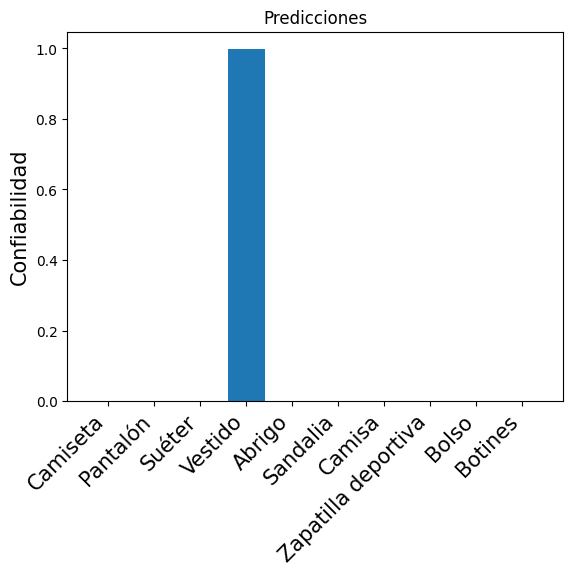

In [ ]:
index = np.arange(len(classNames))
plt.bar(index, img_predict, )
plt.ylabel('Confiabilidad', fontsize=15)
plt.xticks(index, classNames, fontsize=15, rotation=45, ha = 'right')
plt.title('Predicciones')

plt.show()

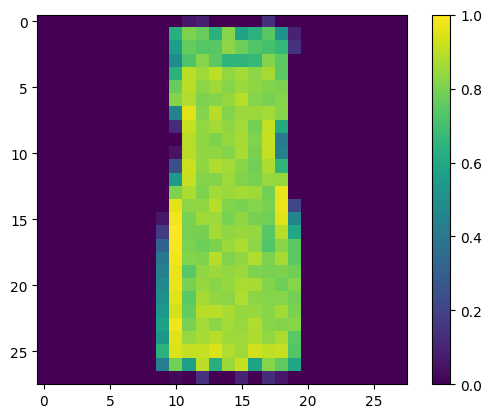

In [ ]:
plt.figure()
plt.imshow(test_images[1996])
plt.colorbar()
plt.grid(False)
plt.show()

# Concluyendo

En conclusion, la red neuronal realizada posee una precision de un 88% para la identificacion de imagenes de prendas de vestir. La red fue configurada con 200 neuronas y podria aumentarse (o incluir mas capas) para probar si la precision del modelo aumenta, considerando que podria afectar el rendimiento de este.